In [23]:
import re
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import StaleElementReferenceException
from bs4 import BeautifulSoup
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




### Create a driver and url needed to access

In [22]:
driver = webdriver.Chrome()
url = 'https://www.thegioididong.com/laptop?g=hoc-tap-van-phong/'
driver.get(url)

### Start to Scrapping 

In [23]:
i=1
while True:
    try:
        more_button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 
                                                                                      "div.view-more>a")))
        more_button.click()
        i+=1
    except:
        break
print('i=', i)    

i= 192


In [24]:
products = driver.find_elements(by=By.CSS_SELECTOR, value='ul.listproduct>li')
print(len(products))


162


In [25]:
name_lst = []
display_lst=[]
processor_lst=[]
weight_lst=[]
memory_lst=[]
ram_lst=[]
img_lst = []
price_lst = []
link_lst = []

for product in products:
    name = product.find_element(by=By.CSS_SELECTOR, value='h3')
    name.get_attribute('title')
    name_lst.append(name.text.strip())
    
    display=product.find_element(by=By.CSS_SELECTOR,value='div.utility>p')
    display_lst.append(display.text.strip().split(" ")[2:])
    
    processor=product.find_element(by=By.CSS_SELECTOR,value='div.utility>p:nth-child(2)')
    processor_lst.append(processor.text.strip().split(" ")[1:])
    
    memory=product.find_element(by=By.CSS_SELECTOR,value="div.item-compare.gray-bg > span:nth-child(2)")
    memory_lst.append(memory.text.strip())
    
    weight=product.find_element(by=By.CSS_SELECTOR,value='div.utility>p:nth-child(5)')
    weight_lst.append(weight.text.strip().split(" ")[2:])
    
    ram=product.find_element(by=By.CSS_SELECTOR,value='div.item-compare.gray-bg>span')
    ram_lst.append(ram.text.strip())
    
    img = product.find_element(by=By.CSS_SELECTOR, value='img')
    img_lst.append(img.get_attribute('data-src'))

    price = product.find_element(by=By.CSS_SELECTOR, value="strong")
    price.get_attribute('price')
    try:
        price_lst.append(float(re.sub('[.₫]', '', price.text)))
    except:
        price_lst.append(None)    
    a = product.find_element(by=By.CSS_SELECTOR, value='a')
    link_lst.append(a.get_attribute('href'))    

In [26]:
brand_list=[]
for item in name_lst :
    brand = item.split()[:1]
    brand_list.append(brand)
brand_list = list(chain.from_iterable(brand_list))
display_lst2 = []
for item in display_lst:
    display_lst2.append(''.join(item))
processor_lst2=[]
for item in processor_lst:
    processor_lst2.append(' '.join(item))
weight_lst2=[]
for item in weight_lst:
    weight_lst2.append(" ".join(item))

In [27]:
df= pd.DataFrame({'Brand':brand_list,'name':name_lst,'Display':display_lst2,'Processor':processor_lst2,
                'Weight':weight_lst2,'Memory':memory_lst,'Ram':ram_lst,'img-url':img_lst,'Price':price_lst,'URL':link_lst})

In [28]:
df

,Brand,name,Display,Processor,Weight,Memory,Ram,img-url,Price,URL
0,MacBook,MacBook Air M1 2020 7-core GPU,"13.3"",Retina",Apple M1,1.29 kg,SSD 256 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/231244/...,18550000.0,https://www.thegioididong.com/laptop/apple-mac...
1,Lenovo,Lenovo Ideapad 3 15IAU7 i3 1215U (82RK005LVN),"15.6"",FullHD","i3, 1215U, 1.2GHz",1.63 kg,SSD 256 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/287769/...,10990000.0,https://www.thegioididong.com/laptop/lenovo-id...
2,HP,HP 15s fq2716TU i3 1115G4 (7C0X3PA),"15.6"",FullHD","i3, 1115G4, 3GHz",1.7 kg,SSD 512 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/301634/...,10990000.0,https://www.thegioididong.com/laptop/hp-15s-fq...
3,Acer,Acer Aspire 3 A315 58 54XF i5 1135G7 (NX.AM0SV...,"15.6"",FullHD","i5, 1135G7, 2.4GHz",1.7 kg,SSD 512 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/285764/...,13690000.0,https://www.thegioididong.com/laptop/acer-aspi...
4,Dell,Dell Vostro 3510 i5 1135G7 (P112F002BBL),"15.6"",FullHD","i5, 1135G7, 2.4GHz",1.69 kg,SSD 512 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/266280/...,17690000.0,https://www.thegioididong.com/laptop/dell-vost...
...,...,...,...,...,...,...,...,...,...,...
157,itel,itel SPIRIT 1 i5 8259U (71006300036),"15.6"",FullHD","i5, 8259U, 2.30 GHz",2.1 kg,SSD 256 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/265532/...,5990000.0,https://www.thegioididong.com/laptop/itel-spir...
158,CHUWI,CHUWI LarkBook X N5100,"14"",2K","Celeron, N5100, 1.1 Ghz",1.4 kg,SSD 256 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/270141/...,5690000.0,https://www.thegioididong.com/laptop/chuwi-lar...
159,Masstel,Masstel E140 N4120,"14"",HD","Celeron, N4120, 1.1GHz",1.35 kg,SSD 128 GB,RAM 4 GB,https://cdn.tgdd.vn/Products/Images/44/302951/...,5490000.0,https://www.thegioididong.com/laptop/masstel-e...
160,itel,itel SPIRIT 1 i3 8109U (71006300035),"15.6"",FullHD","i3, 8109U, 3GHz",2.1 kg,SSD 256 GB,RAM 4 GB,https://cdn.tgdd.vn/Products/Images/44/265530/...,4990000.0,https://www.thegioididong.com/laptop/itel-spir...


In [29]:
df.to_csv('products.csv', index=False)

### Access To a Single Page to scrapping rating star 

In [31]:
df2 = pd.read_csv('products.csv')

In [32]:
df2

,Brand,name,Display,Processor,Weight,Memory,Ram,img-url,Price,URL
0,MacBook,MacBook Air M1 2020 7-core GPU,"13.3"",Retina",Apple M1,1.29 kg,SSD 256 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/231244/...,18550000.0,https://www.thegioididong.com/laptop/apple-mac...
1,Lenovo,Lenovo Ideapad 3 15IAU7 i3 1215U (82RK005LVN),"15.6"",FullHD","i3, 1215U, 1.2GHz",1.63 kg,SSD 256 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/287769/...,10990000.0,https://www.thegioididong.com/laptop/lenovo-id...
2,HP,HP 15s fq2716TU i3 1115G4 (7C0X3PA),"15.6"",FullHD","i3, 1115G4, 3GHz",1.7 kg,SSD 512 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/301634/...,10990000.0,https://www.thegioididong.com/laptop/hp-15s-fq...
3,Acer,Acer Aspire 3 A315 58 54XF i5 1135G7 (NX.AM0SV...,"15.6"",FullHD","i5, 1135G7, 2.4GHz",1.7 kg,SSD 512 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/285764/...,13690000.0,https://www.thegioididong.com/laptop/acer-aspi...
4,Dell,Dell Vostro 3510 i5 1135G7 (P112F002BBL),"15.6"",FullHD","i5, 1135G7, 2.4GHz",1.69 kg,SSD 512 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/266280/...,17690000.0,https://www.thegioididong.com/laptop/dell-vost...
...,...,...,...,...,...,...,...,...,...,...
157,itel,itel SPIRIT 1 i5 8259U (71006300036),"15.6"",FullHD","i5, 8259U, 2.30 GHz",2.1 kg,SSD 256 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/265532/...,5990000.0,https://www.thegioididong.com/laptop/itel-spir...
158,CHUWI,CHUWI LarkBook X N5100,"14"",2K","Celeron, N5100, 1.1 Ghz",1.4 kg,SSD 256 GB,RAM 8 GB,https://cdn.tgdd.vn/Products/Images/44/270141/...,5690000.0,https://www.thegioididong.com/laptop/chuwi-lar...
159,Masstel,Masstel E140 N4120,"14"",HD","Celeron, N4120, 1.1GHz",1.35 kg,SSD 128 GB,RAM 4 GB,https://cdn.tgdd.vn/Products/Images/44/302951/...,5490000.0,https://www.thegioididong.com/laptop/masstel-e...
160,itel,itel SPIRIT 1 i3 8109U (71006300035),"15.6"",FullHD","i3, 8109U, 3GHz",2.1 kg,SSD 256 GB,RAM 4 GB,https://cdn.tgdd.vn/Products/Images/44/265530/...,4990000.0,https://www.thegioididong.com/laptop/itel-spir...


In [33]:
def get_stars_from_product(url):    
    driver.get(url)

    driver.implicitly_wait(10)
    driver.find_element(by=By.TAG_NAME, value='body').send_keys(Keys.END)
    stars = driver.find_elements(by=By.CSS_SELECTOR, value='div.rating-star.left')

    
    data = []
    data2=[]
    for star in stars:
        star_num = star.find_element(by=By.CSS_SELECTOR, value='div.list-star + a').text
        var_stars = star.find_element(by=By.CSS_SELECTOR, value='div.rating-top>p').text
        data.append(star_num)
        data2.append(var_stars)
        
    return data,data2

    

In [34]:
links = df2["URL"]
star_lst = []
option = webdriver.ChromeOptions()

driver = webdriver.Chrome(options=option)
for link in links:
    star_lst.append(get_stars_from_product(link))
    

In [35]:
star_lst

[(['126 đánh giá'], ['4.5']),
 (['42 đánh giá'], ['4.5']),
 (['41 đánh giá'], ['4.3']),
 (['15 đánh giá'], ['4.5']),
 (['47 đánh giá'], ['3.9']),
 (['35 đánh giá'], ['4.8']),
 (['93 đánh giá'], ['4.6']),
 (['29 đánh giá'], ['4.1']),
 (['28 đánh giá'], ['4.1']),
 (['25 đánh giá'], ['4.2']),
 (['22 đánh giá'], ['4.1']),
 (['44 đánh giá'], ['4.0']),
 (['10 đánh giá'], ['4.5']),
 (['16 đánh giá'], ['4.2']),
 (['49 đánh giá'], ['4.2']),
 (['35 đánh giá'], ['4.2']),
 (['62 đánh giá'], ['4.1']),
 (['38 đánh giá'], ['4.4']),
 (['24 đánh giá'], ['4.4']),
 (['25 đánh giá'], ['3.9']),
 (['73 đánh giá'], ['4.2']),
 (['12 đánh giá'], ['4.2']),
 (['47 đánh giá'], ['3.6']),
 (['35 đánh giá'], ['4.3']),
 (['2 đánh giá'], ['4']),
 (['28 đánh giá'], ['4.4']),
 (['28 đánh giá'], ['4.1']),
 (['11 đánh giá'], ['4.6']),
 (['1 đánh giá'], ['5']),
 ([], []),
 (['20 đánh giá'], ['4.6']),
 (['15 đánh giá'], ['4.6']),
 (['26 đánh giá'], ['4.3']),
 (['27 đánh giá'], ['4.4']),
 (['19 đánh giá'], ['4.1']),
 (['10 đ

#### *Here i have some empty data so i convert it into NaN

In [55]:
number_rating = []
average_rating = []

for item in star_lst:
    if item == ([], []):
        number_rating.append(float('NaN'))
        average_rating.append(float('NaN'))
    else:
        number_rating.append(float(item[0][0].split()[0]))
        average_rating.append(float(item[1][0]))

In [59]:
df2['Number rating']= number_rating
df2['Average rating']= average_rating

In [61]:
df2.to_csv('products2.csv', index=False)

### Pre-processing and Analysis the data 

In [3]:
df3 = pd.read_csv('products2.csv')


In [4]:
df3['screensize'] = df3['Display'].str.split(',').str[0].str.replace('"', '')
df3['Resolution'] = df3['Display'].str.split(',').str[1:].str.join(',').str.strip()

In [9]:
df3 =df3.reindex(columns=["Brand","name","Number rating","Average rating","screensize","Resolution","Processor","Weight","Memory","Ram","Price","img-url","URL"])

In [10]:
df3

,Brand,name,Number rating,Average rating,screensize,Resolution,Processor,Weight,Memory,Ram,Price,img-url,URL
0,MacBook,MacBook Air M1 2020 7-core GPU,126.0,4.5,13.3,Retina,Apple M1,1.29 kg,SSD 256 GB,RAM 8 GB,18550000.0,https://cdn.tgdd.vn/Products/Images/44/231244/...,https://www.thegioididong.com/laptop/apple-mac...
1,Lenovo,Lenovo Ideapad 3 15IAU7 i3 1215U (82RK005LVN),42.0,4.5,15.6,FullHD,"i3, 1215U, 1.2GHz",1.63 kg,SSD 256 GB,RAM 8 GB,10990000.0,https://cdn.tgdd.vn/Products/Images/44/287769/...,https://www.thegioididong.com/laptop/lenovo-id...
2,HP,HP 15s fq2716TU i3 1115G4 (7C0X3PA),41.0,4.3,15.6,FullHD,"i3, 1115G4, 3GHz",1.7 kg,SSD 512 GB,RAM 8 GB,10990000.0,https://cdn.tgdd.vn/Products/Images/44/301634/...,https://www.thegioididong.com/laptop/hp-15s-fq...
3,Acer,Acer Aspire 3 A315 58 54XF i5 1135G7 (NX.AM0SV...,15.0,4.5,15.6,FullHD,"i5, 1135G7, 2.4GHz",1.7 kg,SSD 512 GB,RAM 8 GB,13690000.0,https://cdn.tgdd.vn/Products/Images/44/285764/...,https://www.thegioididong.com/laptop/acer-aspi...
4,Dell,Dell Vostro 3510 i5 1135G7 (P112F002BBL),47.0,3.9,15.6,FullHD,"i5, 1135G7, 2.4GHz",1.69 kg,SSD 512 GB,RAM 8 GB,17690000.0,https://cdn.tgdd.vn/Products/Images/44/266280/...,https://www.thegioididong.com/laptop/dell-vost...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,itel,itel SPIRIT 1 i5 8259U (71006300036),33.0,4.3,15.6,FullHD,"i5, 8259U, 2.30 GHz",2.1 kg,SSD 256 GB,RAM 8 GB,5990000.0,https://cdn.tgdd.vn/Products/Images/44/265532/...,https://www.thegioididong.com/laptop/itel-spir...
158,CHUWI,CHUWI LarkBook X N5100,10.0,4.1,14,2K,"Celeron, N5100, 1.1 Ghz",1.4 kg,SSD 256 GB,RAM 8 GB,5690000.0,https://cdn.tgdd.vn/Products/Images/44/270141/...,https://www.thegioididong.com/laptop/chuwi-lar...
159,Masstel,Masstel E140 N4120,2.0,4.0,14,HD,"Celeron, N4120, 1.1GHz",1.35 kg,SSD 128 GB,RAM 4 GB,5490000.0,https://cdn.tgdd.vn/Products/Images/44/302951/...,https://www.thegioididong.com/laptop/masstel-e...
160,itel,itel SPIRIT 1 i3 8109U (71006300035),35.0,4.3,15.6,FullHD,"i3, 8109U, 3GHz",2.1 kg,SSD 256 GB,RAM 4 GB,4990000.0,https://cdn.tgdd.vn/Products/Images/44/265530/...,https://www.thegioididong.com/laptop/itel-spir...


In [11]:
df3.to_csv('product3.csv')


In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           162 non-null    object 
 1   name            162 non-null    object 
 2   Number rating   134 non-null    float64
 3   Average rating  134 non-null    float64
 4   screensize      162 non-null    object 
 5   Resolution      162 non-null    object 
 6   Processor       162 non-null    object 
 7   Weight          162 non-null    object 
 8   Memory          162 non-null    object 
 9   Ram             162 non-null    object 
 10  Price           162 non-null    float64
 11  img-url         162 non-null    object 
 12  URL             162 non-null    object 
dtypes: float64(3), object(10)
memory usage: 16.6+ KB


In [38]:
df3.isnull().sum()


Brand              0
name               0
Number rating     28
Average rating    28
screensize         0
Resolution         0
Processor          0
Weight             0
Memory             0
Ram                0
Price              0
img-url            0
URL                0
dtype: int64

In [39]:
df3.describe(include = 'all')


,Brand,name,Number rating,Average rating,screensize,Resolution,Processor,Weight,Memory,Ram,Price,img-url,URL
count,162,162,134.000000,134.000000,162,162,162,162,162,162,1.620000e+02,162,162
unique,13,160,NaN,NaN,12,10,45,53,5,4,NaN,162,162
top,HP,MacBook Air M2 2022 10-core GPU,NaN,NaN,14,FullHD,"i5, 1235U, 1.3GHz",1.7 kg,SSD 512 GB,RAM 8 GB,NaN,https://cdn.tgdd.vn/Products/Images/44/231244/...,https://www.thegioididong.com/laptop/apple-mac...
freq,36,2,NaN,NaN,66,101,22,24,115,100,NaN,1,1
mean,NaN,NaN,18.716418,4.295522,NaN,NaN,NaN,NaN,NaN,NaN,1.941753e+07,NaN,NaN
std,NaN,NaN,19.310916,0.344422,NaN,NaN,NaN,NaN,NaN,NaN,9.925709e+06,NaN,NaN
min,NaN,NaN,1.000000,3.100000,NaN,NaN,NaN,NaN,NaN,NaN,3.990000e+06,NaN,NaN
25%,NaN,NaN,6.000000,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,1.326500e+07,NaN,NaN
50%,NaN,NaN,13.000000,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,1.699000e+07,NaN,NaN
75%,NaN,NaN,25.750000,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,2.349000e+07,NaN,NaN


In [63]:
df = pd.read_csv('product3.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)


In [64]:
exchange_rate = 23000
df['Price per USD'] =  df['Price'] / exchange_rate


In [65]:
df['Processor'] = df['Processor'].str.split(",").str.get(0)
df['Processor']

0      Apple M1
1            i3
2            i3
3            i5
4            i5
         ...   
157          i5
158     Celeron
159     Celeron
160          i3
161     Celeron
Name: Processor, Length: 162, dtype: object

#### Processor Analysis

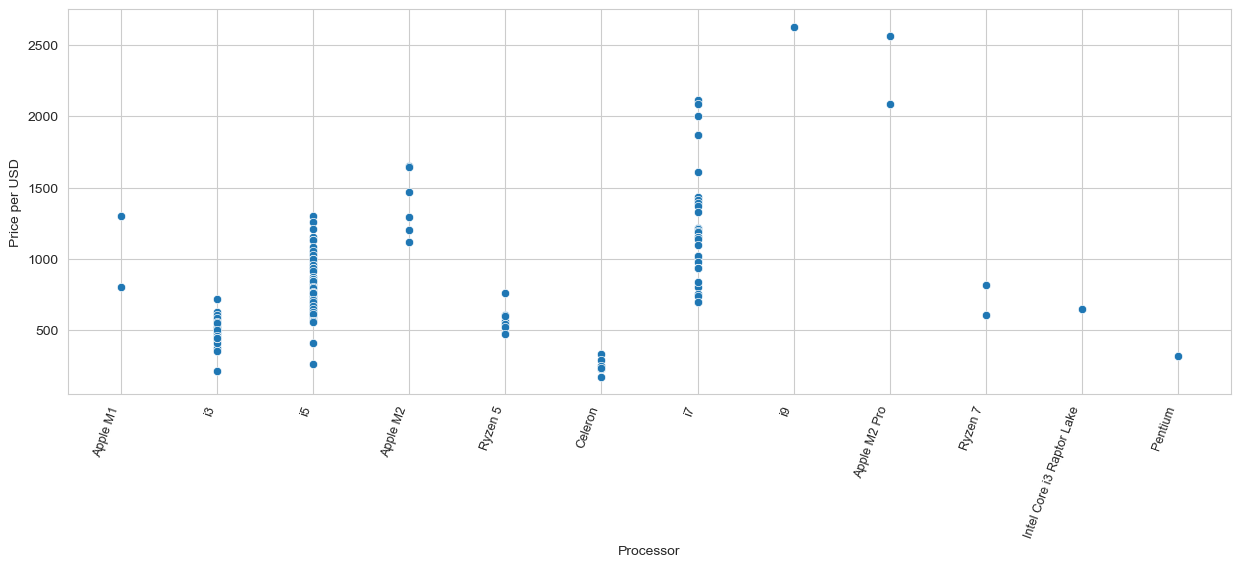

In [66]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Processor'], y=df['Price per USD'])
plt.xticks(rotation=70, horizontalalignment='right', 
           fontsize=9)

print()

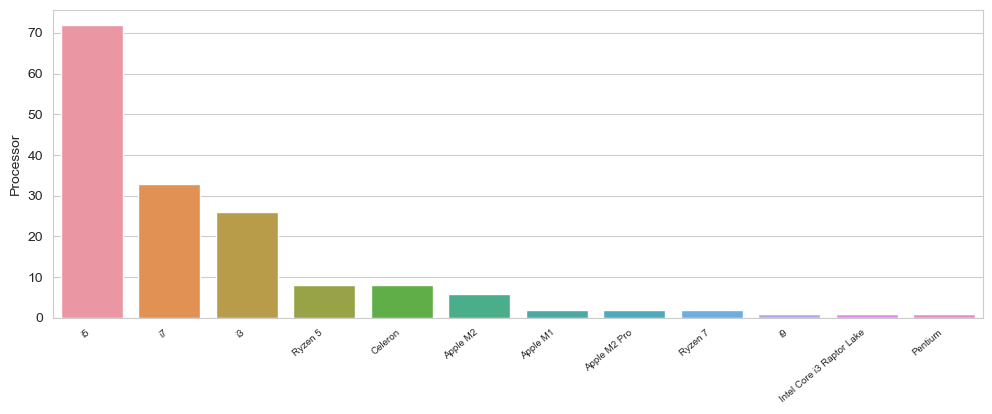

In [67]:
val_counts = df['Processor'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(x=val_counts.index, y=val_counts)
plt.xticks(rotation=40, horizontalalignment='right', 
           fontsize=7)

print()

#### The analysis shows that the price per USD value of Intel products is more diverse than that of office machines, possibly due to the variety of features and performance of Intel products.Especially i5 has the most choices for the office machines, twice as much compare to i7

#### In addition, Apple products have the highest prices among other manufacturers, while Vietnam's Pentium and Celeron products have the lowest prices. This may be due to the difference in brand and quality of the products.

#### The analysis also shows that the Ryzen Processor is not capable of fighting much compared to other products, but this may depend on the intended use of the user. In an overview, this analysis provides information on the price differences of Processor products from different manufacturers and can help users choose the right product for their needs.

#### Ram Analysis

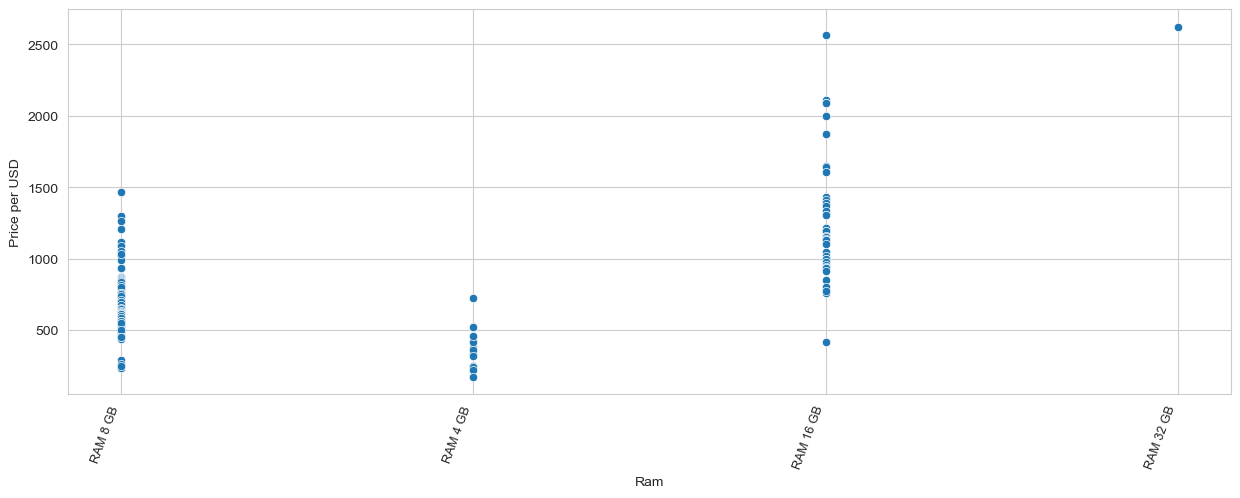

In [68]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Ram'], y=df['Price per USD'])
plt.xticks(rotation=70, horizontalalignment='right', 
           fontsize=9)

print()

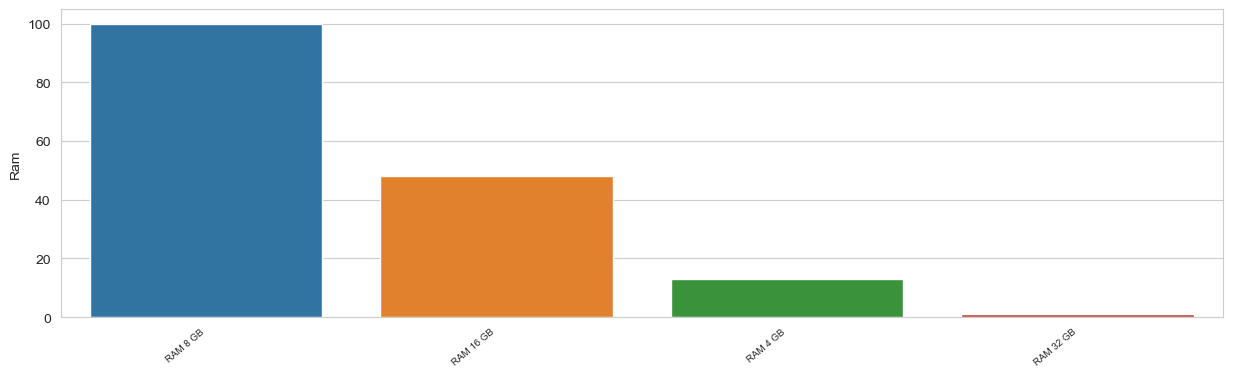

In [69]:
val_counts = df['Ram'].value_counts()

plt.figure(figsize=(15,4))
sns.barplot(x=val_counts.index, y=val_counts)
plt.xticks(rotation=40, horizontalalignment='right', 
           fontsize=7)

print()

### 8gb ram has an average price of 500 USD to less than 1500 USD, this price can be suitable for office users with basic computer needs.

### The trend of the office line can be the focus on providing RAM with 16GB capacity and reasonable price for office users. Computer models with 8GB RAM can be introduced at mid-range prices, while models with 32GB RAM are considered rare and uncommon in the office line.

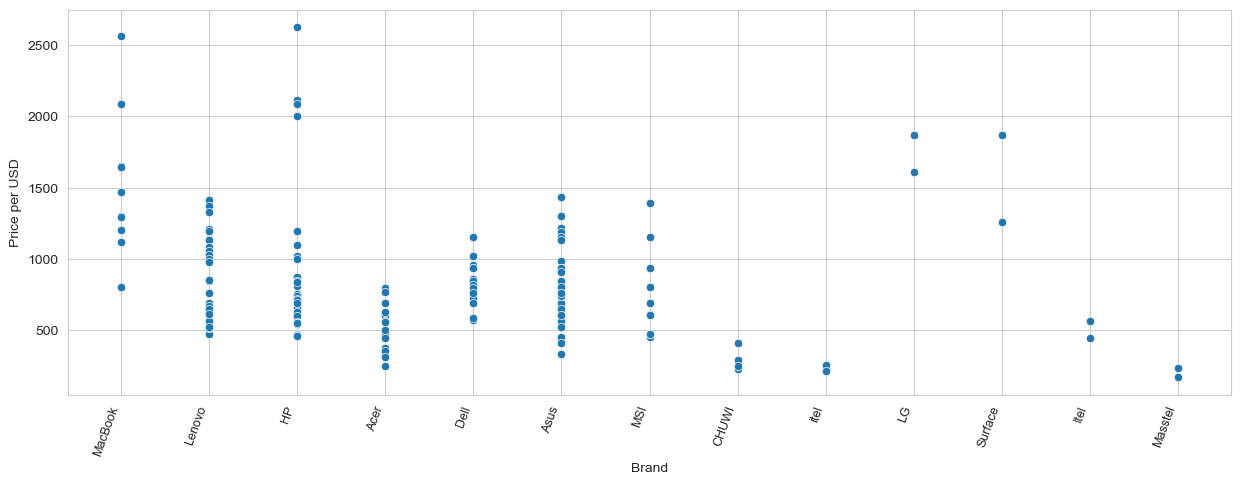

In [70]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Brand'], y=df['Price per USD'])
plt.xticks(rotation=70, horizontalalignment='right', 
           fontsize=9)

print()

### From the above information, we can see that in the office line, brands like ASUS, MSI, HP and Lenovo have strong price competition. 
### Macbook and HP models have higher prices, which can be suitable for customers with high requirements for configuration and features. Meanwhile, products from Intel and the brands Masstel Vietnam and CHUWI have lower prices, which may be suitable for customers with limited budgets or do not need many high-end features.

#### Find features that are often found in office machines

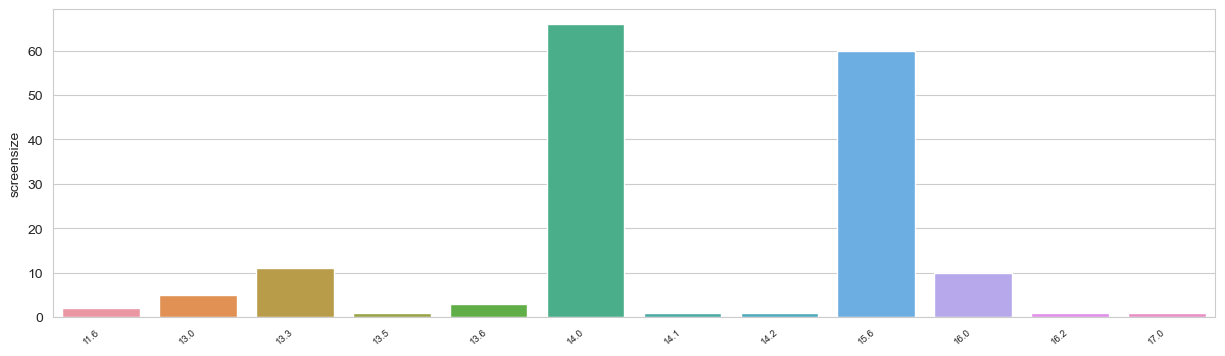

In [71]:
val_counts = df['screensize'].value_counts()

plt.figure(figsize=(15,4))
sns.barplot(x=val_counts.index, y=val_counts)
plt.xticks(rotation=40, horizontalalignment='right', 
           fontsize=7)

print()

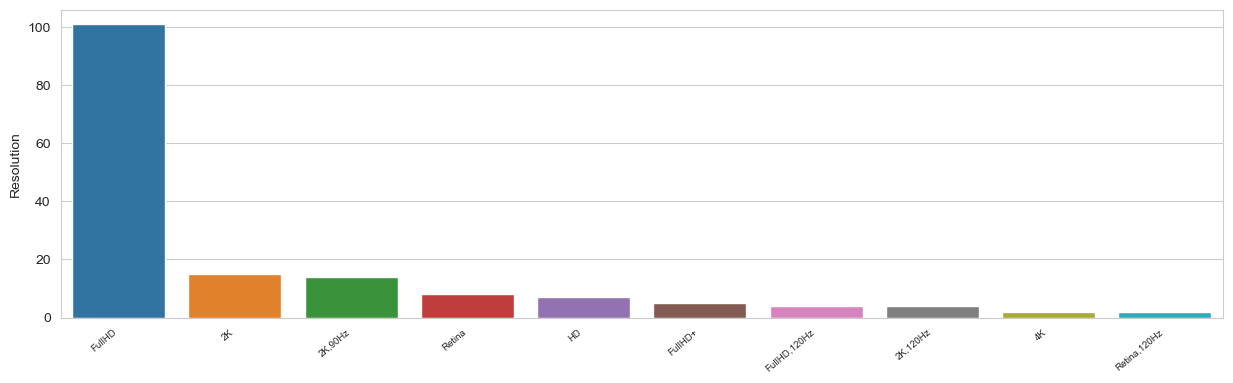

In [72]:
val_counts = df['Resolution'].value_counts()

plt.figure(figsize=(15,4))
sns.barplot(x=val_counts.index, y=val_counts)
plt.xticks(rotation=40, horizontalalignment='right', 
           fontsize=7)

print()

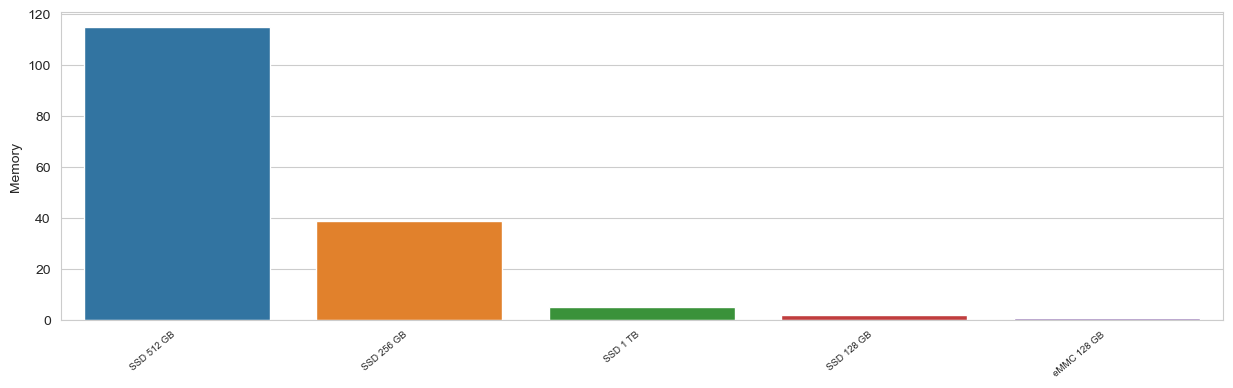

In [73]:
val_counts = df['Memory'].value_counts()

plt.figure(figsize=(15,4))
sns.barplot(x=val_counts.index, y=val_counts)
plt.xticks(rotation=40, horizontalalignment='right', 
           fontsize=7)

print()

### Features such as 14.0 and 15.6 screens, Resolution Full HD and 512GB Memory SSD are commonly used in office machines. From there, it can be seen that the trend of office machines is towards having large and high-quality screens, and using large capacity SSD drives.

### Rating Star Analysis

In [60]:
df.dropna()

,Brand,name,Number rating,Average rating,screensize,Resolution,Processor,Weight,Memory,Ram,Price,img-url,URL
0,MacBook,MacBook Air M1 2020 7-core GPU,126.0,4.5,13.3,Retina,Apple M1,1.29 kg,SSD 256 GB,RAM 8 GB,18550000.0,https://cdn.tgdd.vn/Products/Images/44/231244/...,https://www.thegioididong.com/laptop/apple-mac...
1,Lenovo,Lenovo Ideapad 3 15IAU7 i3 1215U (82RK005LVN),42.0,4.5,15.6,FullHD,"i3, 1215U, 1.2GHz",1.63 kg,SSD 256 GB,RAM 8 GB,10990000.0,https://cdn.tgdd.vn/Products/Images/44/287769/...,https://www.thegioididong.com/laptop/lenovo-id...
2,HP,HP 15s fq2716TU i3 1115G4 (7C0X3PA),41.0,4.3,15.6,FullHD,"i3, 1115G4, 3GHz",1.7 kg,SSD 512 GB,RAM 8 GB,10990000.0,https://cdn.tgdd.vn/Products/Images/44/301634/...,https://www.thegioididong.com/laptop/hp-15s-fq...
3,Acer,Acer Aspire 3 A315 58 54XF i5 1135G7 (NX.AM0SV...,15.0,4.5,15.6,FullHD,"i5, 1135G7, 2.4GHz",1.7 kg,SSD 512 GB,RAM 8 GB,13690000.0,https://cdn.tgdd.vn/Products/Images/44/285764/...,https://www.thegioididong.com/laptop/acer-aspi...
4,Dell,Dell Vostro 3510 i5 1135G7 (P112F002BBL),47.0,3.9,15.6,FullHD,"i5, 1135G7, 2.4GHz",1.69 kg,SSD 512 GB,RAM 8 GB,17690000.0,https://cdn.tgdd.vn/Products/Images/44/266280/...,https://www.thegioididong.com/laptop/dell-vost...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,itel,itel SPIRIT 1 i5 8259U (71006300036),33.0,4.3,15.6,FullHD,"i5, 8259U, 2.30 GHz",2.1 kg,SSD 256 GB,RAM 8 GB,5990000.0,https://cdn.tgdd.vn/Products/Images/44/265532/...,https://www.thegioididong.com/laptop/itel-spir...
158,CHUWI,CHUWI LarkBook X N5100,10.0,4.1,14.0,2K,"Celeron, N5100, 1.1 Ghz",1.4 kg,SSD 256 GB,RAM 8 GB,5690000.0,https://cdn.tgdd.vn/Products/Images/44/270141/...,https://www.thegioididong.com/laptop/chuwi-lar...
159,Masstel,Masstel E140 N4120,2.0,4.0,14.0,HD,"Celeron, N4120, 1.1GHz",1.35 kg,SSD 128 GB,RAM 4 GB,5490000.0,https://cdn.tgdd.vn/Products/Images/44/302951/...,https://www.thegioididong.com/laptop/masstel-e...
160,itel,itel SPIRIT 1 i3 8109U (71006300035),35.0,4.3,15.6,FullHD,"i3, 8109U, 3GHz",2.1 kg,SSD 256 GB,RAM 4 GB,4990000.0,https://cdn.tgdd.vn/Products/Images/44/265530/...,https://www.thegioididong.com/laptop/itel-spir...


In [45]:
df.isnull().sum()

Brand              0
name               0
Number rating     28
Average rating    28
screensize         0
Resolution         0
Processor          0
Weight             0
Memory             0
Ram                0
Price              0
img-url            0
URL                0
Price per USD      0
dtype: int64

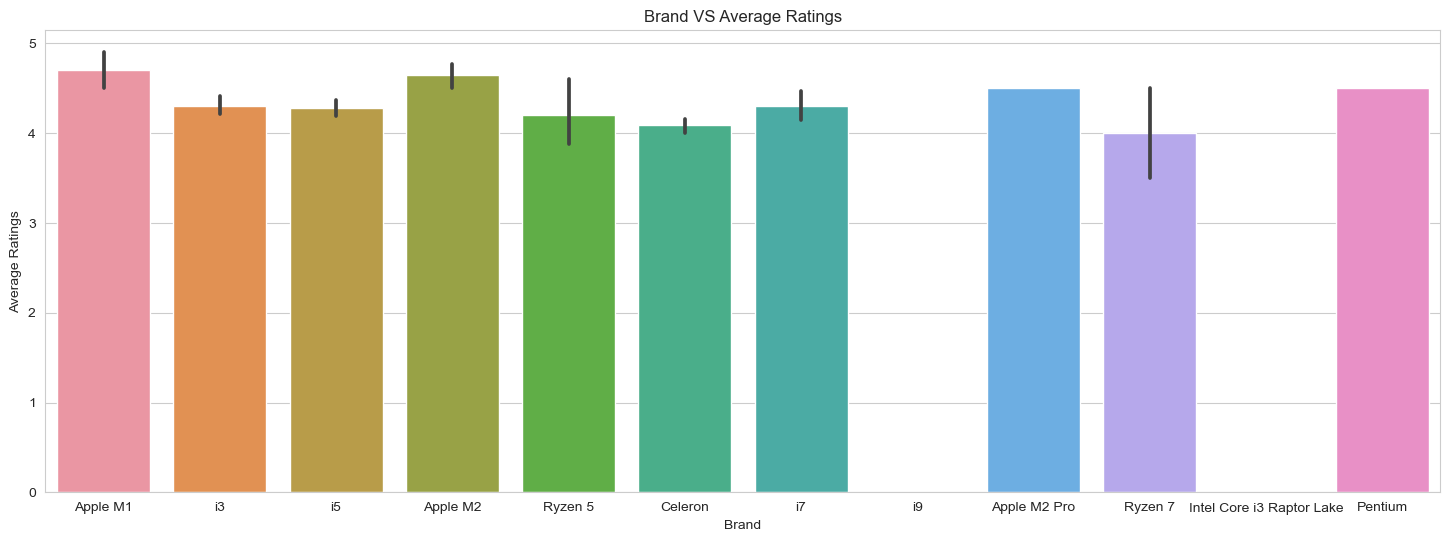

In [74]:
plt.figure(figsize=(18,6))
sns.barplot(data = df,x = df['Processor'], y = df['Average rating'])
plt.xlabel('Brand')
plt.ylabel("Average Ratings")
plt.title("Brand VS Average Ratings")
plt.show()

### The trend of rating distribution is quite even among office laptop brands, but LG is still at the top with the maximum rating. At the same time, Vietnamese laptop manufacturers such as CHUWI and Masstel need to improve product quality to enhance user reviews. However, do not rely too much on the rating, but need to carefully consider the other characteristics of the product before deciding to buy an office laptop.

#### Compare other Brand with Price

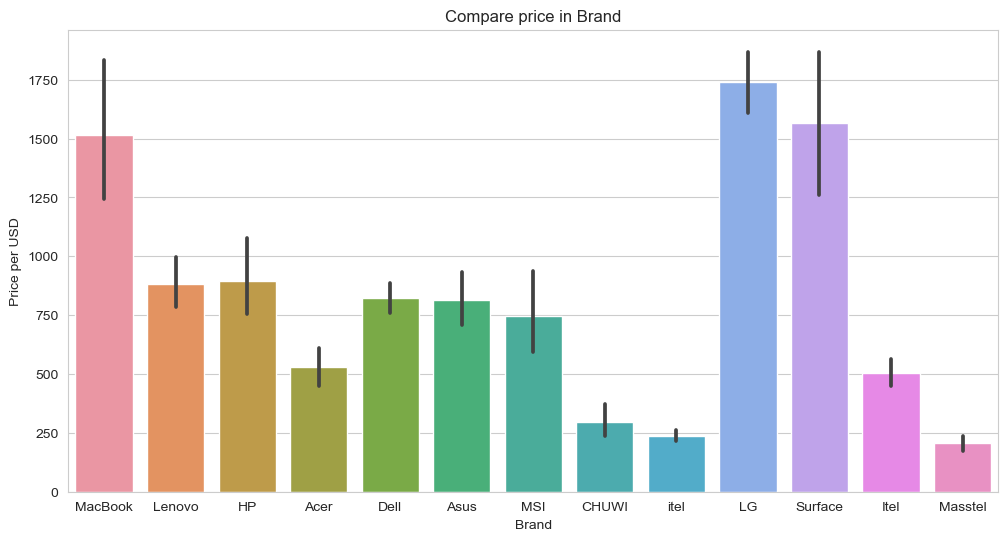

In [75]:
plt.figure(figsize=(12,6))
sns.barplot(data = df,x = df['Brand'], y = df['Price per USD'])
plt.xlabel('Brand')
plt.ylabel("Price per USD")
plt.title("Compare price in Brand")
plt.show()

#### Based on the price and rating information of computer brands in the data, we see that the prices of LG, Surface and Macbook occupy the highest position compared to other models. However, when it comes to the ratings of these brands, they tend to be approximately the same, and LG takes the maximum 5 stars. 
#### In addition, CHUWI and Masstel are the two lowest priced brands while other products are at mid-range prices. From that, it can be seen that price is not the only factor determining product quality. Computer brands need to invest in many different factors such as features, performance and durability to ensure product quality and increase their ratings.

In [35]:
#### Correlation Analysis

In [26]:
df['Weight'] =df['Weight'].str.split().str.get(0)
df['Memory'] =df['Memory'].str.split().str.get(1)
df['Ram'] =df['Ram'].str.split().str.get(1)

In [27]:
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Memory'] = pd.to_numeric(df['Memory'], errors='coerce')

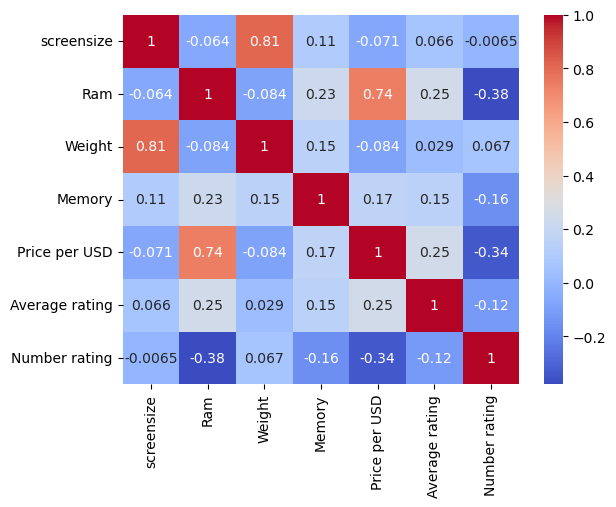

In [28]:
corr_matrix = df[['screensize','Ram','Weight','Memory','Price per USD','Average rating','Number rating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()